This notebook contains function to prepare the data for the analysis.

## Compute basic stats

In [1]:
dataset_dir_name = 'onepercent'
%run 'lib/Lib time series preparation.ipynb'

# prepare list of pages

file_page_names = "%s/pagenames" % dataset_dir_name
list_of_page_names = [x.strip() for x in codecs.open(file_page_names,"r","utf-8").readlines()]
print 'Number of pages in file:',len(list_of_page_names)
#gather_and_compute_data(dataset_dir_name,list_of_page_names)

def update_list_of_pages(dataset_dir_name,list_of_page_names):
    data_pages_dir_name = '%s/data/pages/' % dataset_dir_name
    result=[]
    for page_name in list_of_page_names:
        path,hashmd5 = get_path_to_file(page_name)
        file_name = '%s/%s/%s.json'%(data_pages_dir_name, path, hashmd5)
        if (os.path.exists(file_name)):
            with open(file_name) as f:
                result.append(page_name)
    return(result)

list_of_page_names = update_list_of_pages(dataset_dir_name,list_of_page_names)
print 'Number of pages updated:',len(list_of_page_names)

# get the statistics
stats_dir_name = '%s/stats' % (dataset_dir_name)
basic_stats_file_name = '%s/basic_stats.csv' % stats_dir_name

df_basic_stats = pd.DataFrame()

if ( os.path.exists(basic_stats_file_name) ):
    df_basic_stats = df_basic_stats.from_csv(basic_stats_file_name, encoding="utf-8")
else:
    df_basic_stats = stat_computation(dataset_dir_name,list_of_page_names)
    df_basic_stats.to_csv(basic_stats_file_name, encoding="utf-8")
    
df_basic_stats = df_basic_stats.fillna(0)



Number of pages in file: 48122
Number of pages updated: 48057


## page of importance low and ???

In [2]:
df_0 = df_basic_stats[df_basic_stats['Importance']==0].fillna(0)
df_0=df_0[['Length','revisions_2010','revisions_2014','revisions_bef_2015',
            'revisions_ip_bef_2015','revisions_members_bef_2015',
            'Page_views_2010','Page_views_2011','Page_views_2012',
            'Page_views_2013','Page_views_2014','Quality']]
df_res_0 = df_0.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
display(df_res_0)

df_1 = df_basic_stats[df_basic_stats['Importance']==1].fillna(0)
df_1=df_1[['Length','revisions_2010','revisions_2014','revisions_bef_2015',
            'revisions_ip_bef_2015','revisions_members_bef_2015',
            'Page_views_2010','Page_views_2011','Page_views_2012',
            'Page_views_2013','Page_views_2014','Quality']]
df_res_1 = df_1.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
display(df_res_1)

,Length,revisions_2010,revisions_2014,revisions_bef_2015,revisions_ip_bef_2015,revisions_members_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014,Quality
count,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000,19204.000000
mean,4609.267965,12.384087,11.397886,54.425432,14.954228,33.998230,6495.153041,7210.250521,8191.666111,7919.977609,7346.880806,1.127369
std,7876.332260,44.423854,36.045944,177.866071,80.525786,98.466403,38924.100954,43374.233402,47089.527140,40360.601815,32285.209463,0.673033
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,446.000000,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,0.000000,6.000000,146.000000,490.000000,1.000000
20%,945.000000,0.000000,1.000000,8.000000,0.000000,6.000000,2.000000,29.000000,297.000000,474.000000,719.000000,1.000000
30%,1476.000000,0.000000,2.000000,12.000000,0.000000,8.000000,51.000000,405.900000,682.000000,705.900000,960.000000,1.000000
40%,2001.000000,2.000000,3.000000,17.000000,1.000000,12.000000,675.000000,782.000000,1016.000000,964.000000,1234.000000,1.000000
50%,2616.500000,4.000000,4.000000,23.000000,1.000000,16.000000,1261.000000,1173.000000,1435.500000,1331.500000,1626.500000,1.000000
60%,3371.000000,6.000000,6.000000,30.000000,3.000000,21.000000,1870.800000,1704.000000,2038.800000,1858.800000,2228.000000,1.000000


,Length,revisions_2010,revisions_2014,revisions_bef_2015,revisions_ip_bef_2015,revisions_members_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014,Quality
count,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000,21678.000000
mean,5298.154304,13.532383,11.716810,57.405526,15.712151,35.131516,5490.389750,6393.190008,7444.276363,7919.453547,8736.831211,1.413092
std,8999.726035,47.754543,38.633415,171.372029,75.822408,97.804143,46373.353164,47754.466217,48384.073756,58467.698500,231486.232002,0.727407
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
10%,1017.000000,0.000000,1.000000,4.000000,0.000000,3.000000,0.000000,0.000000,7.000000,136.000000,473.000000,1.000000
20%,1422.000000,0.000000,2.000000,8.000000,0.000000,5.000000,1.000000,18.000000,277.000000,431.000000,676.400000,1.000000
30%,1819.000000,0.000000,2.000000,12.000000,0.000000,8.000000,30.100000,355.000000,610.100000,637.000000,888.000000,1.000000
40%,2238.000000,3.000000,3.000000,17.000000,0.000000,11.000000,594.000000,697.000000,916.000000,871.800000,1139.000000,1.000000
50%,2883.000000,5.000000,4.000000,23.000000,1.000000,15.000000,1164.500000,1031.000000,1279.000000,1169.000000,1477.000000,1.000000
60%,3694.200000,7.000000,6.000000,31.000000,2.000000,20.000000,1717.000000,1439.000000,1764.000000,1609.200000,1970.200000,1.000000


Since page of low importance and ??? have the same kind of profile, we consider all the pages of ??? importance of pages of low importance.

In [3]:
for k in df_basic_stats.index:
    if df_basic_stats.ix[k,'Importance'] == 0:
        df_basic_stats.ix[k,'Importance'] = 1

# Data analysis based on importance

## computation of min pageviews and max pageviews for a page

In [4]:
df_basic_stats.head(5)

for k in df_basic_stats.index:
    df_basic_stats.ix[k,'Min_Page_views'] = min([df_basic_stats.ix[k,'Page_views_2010'],
                                                 df_basic_stats.ix[k,'Page_views_2011'],
                                                 df_basic_stats.ix[k,'Page_views_2012'],
                                                 df_basic_stats.ix[k,'Page_views_2013'],
                                                 df_basic_stats.ix[k,'Page_views_2014']])
    df_basic_stats.ix[k,'Max_Page_views'] = max([df_basic_stats.ix[k,'Page_views_2010'],
                                                 df_basic_stats.ix[k,'Page_views_2011'],
                                                 df_basic_stats.ix[k,'Page_views_2012'],
                                                 df_basic_stats.ix[k,'Page_views_2013'],
                                                 df_basic_stats.ix[k,'Page_views_2014']])

,Length,revisions_2010,revisions_2014,revisions_bef_2015,revisions_ip_bef_2015,revisions_members_bef_2015,Min_Page_views,Max_Page_views,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014,Quality
count,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000,40882.000000
mean,4974.555330,12.992980,11.566998,56.005650,15.356122,34.599163,4104.352747,12115.956803,5962.369454,6776.997799,7795.356856,7919.699721,8083.912871,1.278876
std,8497.408723,46.222872,37.440132,174.456861,78.067037,98.116220,23734.365252,179885.612628,43037.422674,45750.411206,47781.212563,50772.145225,170011.205256,0.716711
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,752.000000,0.000000,1.000000,4.000000,0.000000,3.000000,0.000000,553.000000,0.000000,0.000000,7.000000,142.000000,480.000000,1.000000
20%,1228.000000,0.000000,2.000000,8.000000,0.000000,5.000000,1.000000,866.000000,1.000000,22.000000,285.000000,450.000000,696.000000,1.000000
30%,1684.000000,0.000000,2.000000,12.000000,0.000000,8.000000,35.000000,1200.000000,39.000000,378.000000,640.000000,669.000000,919.300000,1.000000
40%,2127.400000,3.000000,3.000000,17.000000,0.000000,11.000000,419.000000,1597.000000,633.000000,734.000000,963.000000,915.000000,1181.000000,1.000000
50%,2752.500000,4.000000,4.000000,23.000000,1.000000,15.000000,725.000000,2087.000000,1211.000000,1090.000000,1346.000000,1241.000000,1545.000000,1.000000
60%,3537.000000,7.000000,6.000000,31.000000,3.000000,21.000000,1084.000000,2787.000000,1786.600000,1551.000000,1880.000000,1731.000000,2086.000000,1.000000


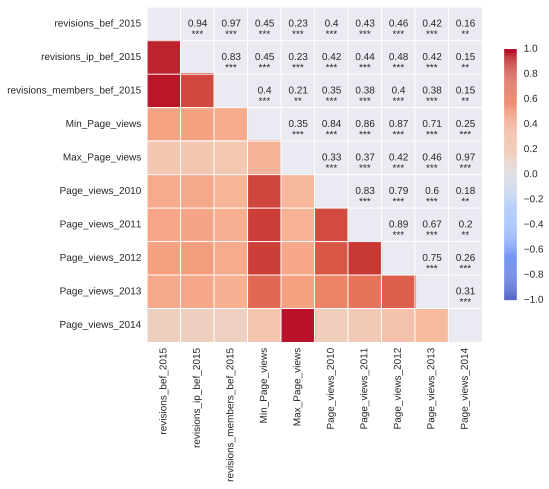

,Length,revisions_2010,revisions_2014,revisions_bef_2015,revisions_ip_bef_2015,revisions_members_bef_2015,Min_Page_views,Max_Page_views,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014,Quality
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,9656.459978,33.019737,25.324379,150.127924,47.561586,90.444262,15610.579678,36783.902230,19925.758589,22448.216192,28467.261696,29149.118056,24936.822003,1.923977
std,12216.190057,81.488615,84.077085,344.589734,153.488480,189.424679,66574.940765,251639.344843,83833.112110,119183.252656,225466.522049,219538.939081,180568.302683,0.972137
min,199.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
10%,1715.200000,0.000000,2.000000,10.000000,0.000000,7.000000,0.000000,1166.100000,1.000000,47.100000,455.100000,564.100000,862.000000,1.000000
20%,2326.200000,3.000000,3.000000,19.000000,0.000000,13.000000,387.200000,1761.200000,692.400000,750.200000,1040.000000,1009.000000,1328.200000,1.000000
30%,3244.000000,6.000000,4.000000,29.000000,1.000000,20.000000,862.000000,2545.600000,1424.300000,1278.300000,1656.600000,1579.300000,1944.300000,1.000000
40%,4417.000000,8.000000,6.000000,41.000000,3.000000,28.000000,1449.200000,3549.800000,2149.000000,1957.400000,2535.400000,2376.000000,2847.000000,2.000000
50%,5709.000000,12.000000,8.000000,56.000000,6.000000,38.000000,2284.000000,5198.500000,3085.000000,2936.500000,3741.000000,3581.500000,4092.500000,2.000000
60%,7443.200000,16.000000,11.000000,77.000000,12.000000,52.000000,3529.000000,7728.000000,4570.200000,4628.200000,5937.400000,5814.000000,6271.000000,2.000000


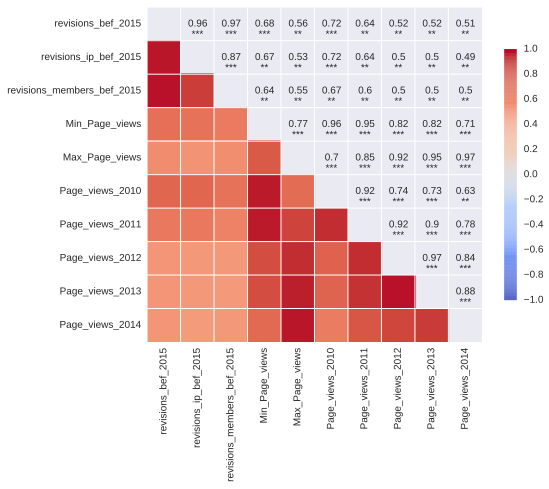

,Length,revisions_2010,revisions_2014,revisions_bef_2015,revisions_ip_bef_2015,revisions_members_bef_2015,Min_Page_views,Max_Page_views,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014,Quality
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000
mean,17446.495468,79.974320,45.910876,367.314955,123.665408,222.456949,41585.783988,89169.772659,57337.820997,60463.763595,70441.570997,67354.396526,55767.034743,2.300604
std,23952.179413,224.922315,91.775843,906.025651,356.281684,553.180224,112790.652470,307523.110087,199943.973585,192591.054148,264153.416725,198126.414820,154209.356894,1.116210
min,57.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
10%,2377.400000,2.000000,3.000000,20.300000,1.000000,15.000000,27.200000,1952.800000,27.200000,493.700000,920.900000,1098.000000,1464.000000,1.000000
20%,3738.200000,7.000000,5.000000,38.000000,3.000000,25.600000,1088.000000,3350.600000,1724.400000,1628.800000,2084.600000,2031.600000,2575.800000,1.000000
30%,5346.300000,11.000000,8.000000,60.000000,7.000000,41.000000,2208.100000,5341.400000,3017.200000,2838.700000,3868.100000,3639.200000,4561.100000,2.000000
40%,7349.600000,17.000000,12.000000,89.000000,14.000000,61.000000,3953.000000,8807.200000,4789.200000,4954.800000,6332.800000,6251.400000,7524.800000,2.000000
50%,9810.000000,25.000000,17.000000,124.000000,24.000000,83.000000,6683.000000,13933.000000,8021.000000,8291.000000,10108.000000,10201.000000,11371.500000,2.000000
60%,12993.400000,38.000000,25.000000,175.400000,42.000000,111.000000,11867.800000,23051.200000,13953.200000,14668.000000,17070.600000,17755.400000,18370.800000,2.000000


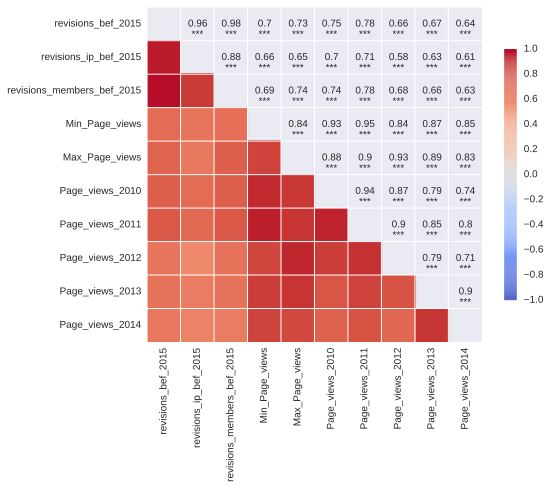

,Length,revisions_2010,revisions_2014,revisions_bef_2015,revisions_ip_bef_2015,revisions_members_bef_2015,Min_Page_views,Max_Page_views,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014,Quality
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,32046.722955,195.100264,111.353562,901.844327,322.839050,531.395778,137335.765172,252282.430079,179412.923483,182968.026385,224455.522427,206981.379947,159191.390501,2.963061
std,36294.068029,328.637617,219.599531,1666.555202,623.267158,1042.048317,324404.309767,688197.358860,430240.598801,443821.767589,646062.727537,510777.334424,383315.160689,1.342708
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,657.000000,0.000000,0.000000,0.000000,0.000000,657.000000,1.000000
10%,3954.200000,5.000000,5.000000,33.800000,2.000000,24.000000,47.400000,3866.400000,47.400000,1009.200000,1847.600000,2255.800000,3258.400000,1.000000
20%,6830.600000,12.000000,11.000000,80.600000,11.600000,50.000000,2779.000000,7978.800000,3652.000000,3610.400000,6040.400000,5707.800000,7301.000000,2.000000
30%,11024.400000,25.000000,17.400000,134.800000,23.400000,93.800000,8071.600000,15439.400000,9295.200000,9550.800000,13062.000000,12318.400000,13056.400000,2.000000
40%,15895.800000,41.200000,28.000000,216.200000,44.400000,135.600000,16687.600000,29170.400000,19174.600000,18747.800000,22459.000000,23008.400000,24081.800000,2.000000
50%,21152.000000,63.000000,45.000000,325.000000,77.000000,200.000000,27559.000000,49926.000000,30635.000000,33430.000000,36305.000000,38082.000000,37163.000000,3.000000
60%,27071.200000,102.000000,65.000000,450.600000,132.200000,291.000000,44712.400000,82454.400000,58036.600000,59112.200000,69110.600000,71003.800000,63246.800000,3.000000


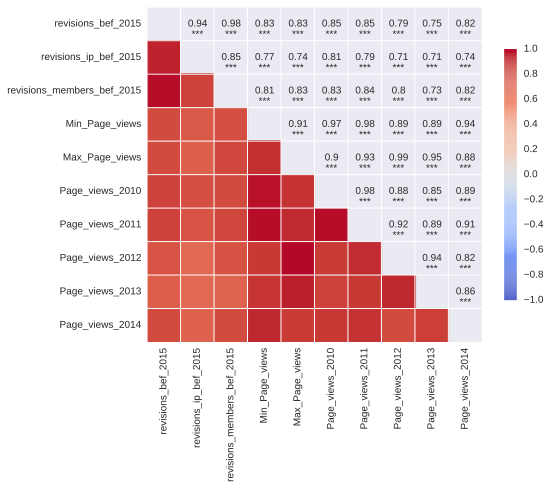

In [5]:
# print correlation matrix by importance

for j in [1,2,3,4]:
    display(HTML('<h2>Report for page of importance %s.</h2>' % (j)))
    f, ax = plt.subplots(figsize=(8, 6))
    df_tmp = df_basic_stats[df_basic_stats['Importance']==j].fillna(0)
    display(HTML('Number of pages %s' %(len(df_tmp.index))))
    sns.corrplot(df_tmp[['revisions_bef_2015','revisions_ip_bef_2015','revisions_members_bef_2015','Min_Page_views',
                         'Max_Page_views','Page_views_2010','Page_views_2011','Page_views_2012',
                         'Page_views_2013','Page_views_2014']],diag_names=False)
    df_tmp =df_tmp[['Length','revisions_2010','revisions_2014','revisions_bef_2015',
                    'revisions_ip_bef_2015','revisions_members_bef_2015','Min_Page_views',
                    'Max_Page_views','Page_views_2010','Page_views_2011','Page_views_2012',
                    'Page_views_2013','Page_views_2014','Quality']]
    display(df_tmp.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
    plt.show()

We see that the stability of the page views is proportionnel to the importance.
Also the number of revisions is more correlated to the page views if the page is more important.

-> workload is better distributed on the important article

## Analysis depending of the quality

The correlation coeeficient can be further improved by partitiong the set of pages of the same importance using the quality. 

,revisions_2014,revisions_bef_2015,revisions_members_bef_2015,revisions_ip_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,14.453125,78.515625,54.165625,16.981250,6647.303125,7093.553125,8978.421875,9837.878125,9925.471875
std,31.892418,136.808379,102.835386,42.556541,18398.887674,20418.821248,24642.751298,29186.243721,24263.732493
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000
25%,3.000000,18.000000,13.000000,1.000000,1049.750000,933.750000,1166.750000,1108.000000,1432.500000
50%,6.000000,36.000000,23.000000,3.500000,2493.500000,1947.000000,2457.000000,2184.000000,2812.000000
75%,14.000000,74.250000,50.250000,12.000000,4827.500000,4929.500000,6647.250000,6660.750000,7441.500000
max,327.000000,1184.000000,961.000000,391.000000,192613.000000,210290.000000,234023.000000,321312.000000,200694.000000


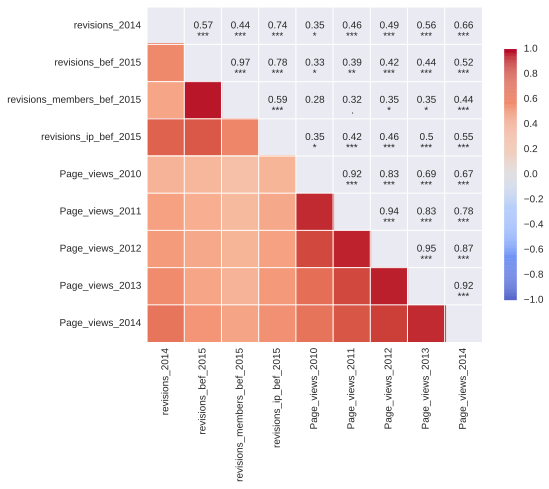

,revisions_2014,revisions_bef_2015,revisions_members_bef_2015,revisions_ip_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,32.920553,213.134715,129.331606,66.725389,32045.267703,34521.069085,42764.649396,40003.765112,32997.981002
std,47.098886,313.615873,193.930428,125.621385,68772.780973,76381.420060,126931.356946,90914.391190,57398.039864
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,63.000000,40.000000,8.000000,3203.000000,2954.000000,4196.500000,3983.500000,4670.000000
50%,17.000000,123.000000,80.000000,27.000000,9841.000000,9576.000000,10918.000000,11744.000000,12662.000000
75%,37.500000,248.500000,151.000000,71.000000,27841.500000,29148.000000,34256.000000,34569.500000,33690.000000
max,352.000000,3834.000000,2936.000000,1396.000000,829923.000000,857737.000000,2350775.000000,1131015.000000,425044.000000


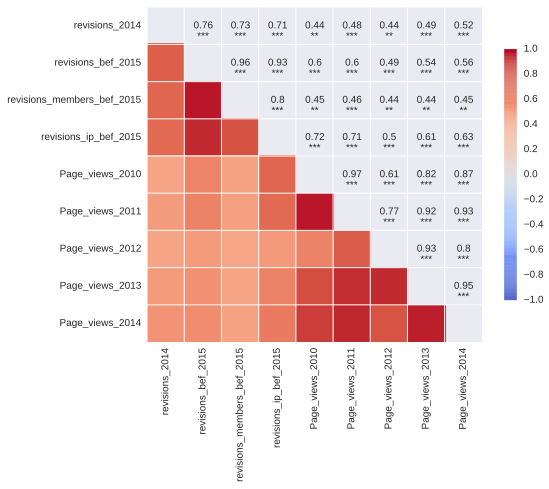

,revisions_2014,revisions_bef_2015,revisions_members_bef_2015,revisions_ip_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,70.307292,548.421875,323.614583,193.130208,81486.213542,89831.947917,88575.078125,88362.406250,81693.156250
std,88.880968,855.070711,543.946311,316.529063,159018.351421,175545.994407,143264.425359,139133.356703,144273.863969
min,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1078.000000
25%,17.000000,118.750000,83.750000,17.500000,5358.000000,7412.250000,9072.250000,8641.500000,10350.000000
50%,41.500000,309.500000,181.000000,81.500000,25623.500000,29714.500000,34604.000000,35768.000000,34957.500000
75%,90.000000,631.250000,367.250000,210.250000,86174.000000,97985.500000,112790.500000,106202.250000,87816.500000
max,747.000000,8478.000000,6088.000000,2128.000000,1330116.000000,1588674.000000,895414.000000,786859.000000,1285823.000000


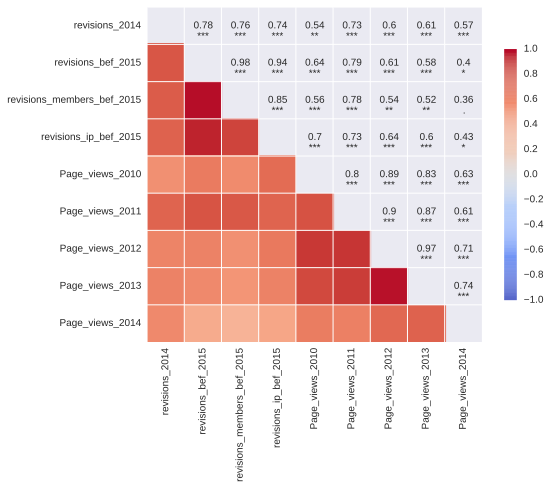

,revisions_2014,revisions_bef_2015,revisions_members_bef_2015,revisions_ip_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014
count,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,95.92973,852.416216,486.729730,325.010811,147304.983784,152084.297297,179674.621622,189918.832432,153521.000000
std,172.58089,1460.104819,771.853199,681.029033,334192.359450,296429.110745,399967.895209,387362.540089,311552.139528
min,1.00000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,180.000000,975.000000
25%,16.00000,131.000000,90.000000,19.000000,4828.000000,5347.000000,7784.000000,7872.000000,9169.000000
50%,40.00000,335.000000,218.000000,79.000000,26952.000000,29665.000000,36973.000000,40060.000000,39758.000000
75%,101.00000,954.000000,521.000000,314.000000,132199.000000,152991.000000,177616.000000,200800.000000,154989.000000
max,1172.00000,10649.000000,6581.000000,6128.000000,2794504.000000,1783294.000000,3562888.000000,2499955.000000,2534327.000000


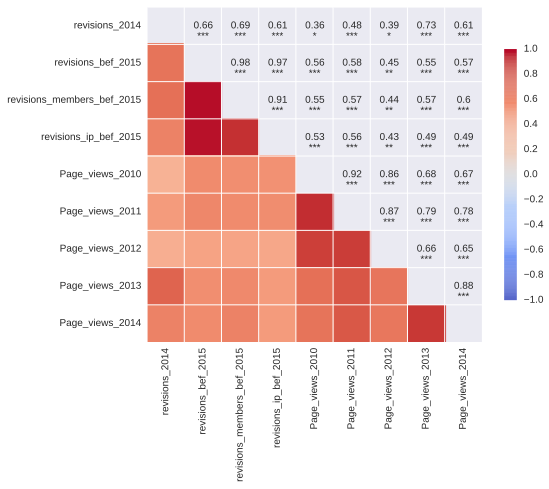

,revisions_2014,revisions_bef_2015,revisions_members_bef_2015,revisions_ip_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,138.000000,1655.500000,1112.388889,496.333333,277265.138889,265948.583333,332714.361111,214560.194444,150483.166667
std,184.993436,2994.151294,2041.228360,937.109599,735266.387807,691783.774218,1058110.255896,477036.389693,311534.622007
min,1.000000,60.000000,57.000000,0.000000,0.000000,0.000000,2782.000000,1959.000000,2680.000000
25%,23.500000,182.000000,148.000000,34.250000,6925.250000,7370.750000,12701.000000,13540.250000,10956.750000
50%,70.000000,618.000000,429.500000,143.500000,42055.000000,42079.000000,59531.000000,65514.500000,49012.500000
75%,185.750000,1596.000000,1058.500000,492.250000,192261.000000,177136.750000,197291.500000,185001.500000,139190.750000
max,945.000000,13100.000000,9599.000000,3947.000000,3585657.000000,3652046.000000,6198907.000000,2556416.000000,1687910.000000


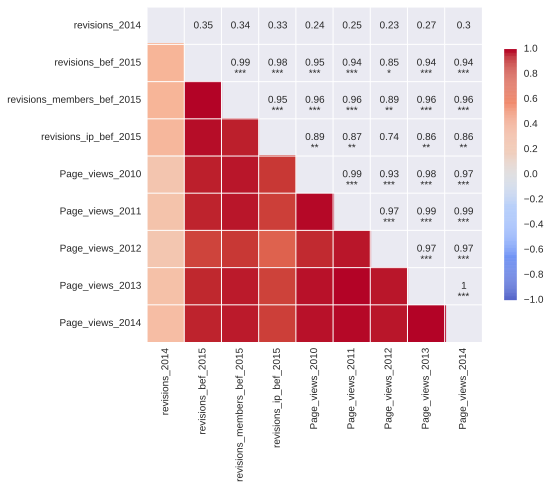

,revisions_2014,revisions_bef_2015,revisions_members_bef_2015,revisions_ip_bef_2015,Page_views_2010,Page_views_2011,Page_views_2012,Page_views_2013,Page_views_2014
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,73.833333,1266.916667,841.000000,382.416667,196300.666667,236575.750000,283906.333333,253515.583333,170808.916667
std,62.983163,1271.327757,719.995581,545.856035,297304.541001,410200.363263,549491.285625,432875.221312,267283.130546
min,8.000000,158.000000,150.000000,5.000000,0.000000,7085.000000,5977.000000,6250.000000,5359.000000
25%,15.500000,391.000000,349.750000,33.000000,14884.000000,11923.500000,18852.500000,11904.500000,13334.000000
50%,72.000000,800.500000,635.500000,129.000000,79511.000000,86111.000000,102072.000000,118725.000000,81641.000000
75%,109.750000,1643.750000,1038.500000,478.000000,223230.250000,239034.250000,252644.000000,246765.250000,173446.750000
max,214.000000,4574.000000,2578.000000,1871.000000,1026323.000000,1447185.000000,1970364.000000,1535724.000000,934200.000000


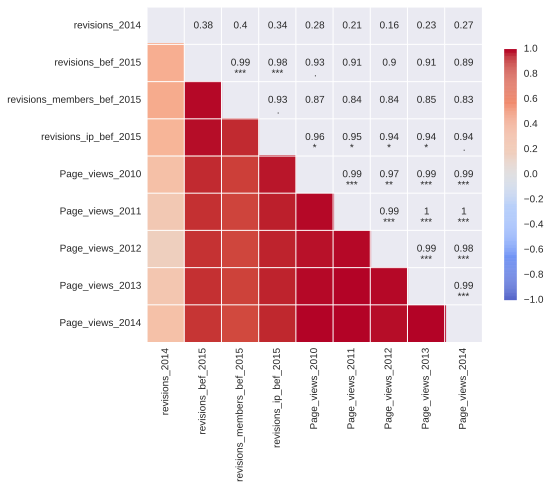

In [6]:
j=3
for i in range(1,7):
    display(HTML('<h1>Correlation matrix for pages of quality %s and importance %s.</h1>' % (i,j)))    
    select = df_basic_stats[(df_basic_stats['Quality']==i) & (df_basic_stats['Importance']==j)].index
    if len(select)>0:
        display(HTML('Number of pages: %s' % (len(select))))
        f, ax = plt.subplots(figsize=(8, 6))
        df_tmp = df_basic_stats[df_basic_stats.index.isin(select)]     
        df_tmp = df_tmp[['revisions_2014','revisions_bef_2015','revisions_members_bef_2015','revisions_ip_bef_2015',
                         'Page_views_2010','Page_views_2011','Page_views_2012',
                         'Page_views_2013','Page_views_2014']]
        display(df_tmp.describe())
        #print df_tmp.head(5)
        sns.corrplot(df_tmp,diag_names=False )
        plt.show()
        #print df_basic_stats[df_basic_stats.index.isin(select)].head(5)

In [3]:
# contribution based on importance

def evolution_of_contribution_based_on_importance(dataset_dir_name,list_of_page_names):
    time_series_dir_name = '%s/stats/time series/' % dataset_dir_name
    df_res = pd.DataFrame()
    for i in range(0,5):
        df_res[''.join(['Importance_',str(i)])]=np.NaN

    for title in list_of_page_names:
        try:
            quality,impor,islist=get_quality(title)
            if impor == 0:
                impor=1
            a,b,c,dic_ts = get_pages_members_revisions_time_series(dataset_dir_name,[title])
            if title in dic_ts.keys():
                df_res = df_res.join(dic_ts[title],how='outer').fillna(0)              
                df_res['sum'] = df_res[['revisions',''.join(['Importance_',str(impor)])]].sum(axis=1)
                df_res.drop('revisions', axis=1, inplace=True)
                df_res.drop(''.join(['Importance_',str(impor)]), axis=1, inplace=True)
                df_res.rename(columns={'sum': ''.join(['Importance_',str(impor)])}, inplace=True)
            else:
                pass
        except Exception as e:
            print e
            return(df_res)
    return(df_res)

importance_file_name = '%s/importance_stats.csv' % stats_dir_name

df_importance = pd.DataFrame()

if ( os.path.exists(importance_file_name) ):
    df_importance = df_importance.from_csv(importance_file_name, encoding="utf-8")
else:
    df_importance = evolution_of_contribution_based_on_importance(dataset_dir_name,list_of_page_names)
    df_importance.to_csv(importance_file_name, encoding="utf-8")
    
df_importance = df_importance.fillna(0)


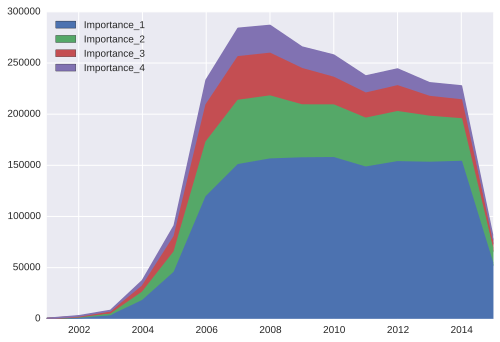

In [22]:
df_importance.plot(kind='area',sort_columns=True)

In [17]:
# contribution based on importance

def evolution_of_contribution_based_on_quality(dataset_dir_name,list_of_page_names):
    time_series_dir_name = '%s/stats/time series/' % dataset_dir_name
    df_res = pd.DataFrame()
    for i in range(1,7):
        df_res[''.join(['Quality_',str(i)])]=np.NaN

    for title in list_of_page_names:
        try:
            quality,impor,islist=get_quality(title)
            if quality == 0:
                quality=1
            a,b,c,dic_ts = get_pages_members_revisions_time_series(dataset_dir_name,[title])
            if title in dic_ts.keys():
                df_res = df_res.join(dic_ts[title],how='outer').fillna(0)              
                df_res['sum'] = df_res[['revisions',''.join(['Quality_',str(quality)])]].sum(axis=1)
                df_res.drop('revisions', axis=1, inplace=True)
                df_res.drop(''.join(['Quality_',str(quality)]), axis=1, inplace=True)
                df_res.rename(columns={'sum': ''.join(['Quality_',str(quality)])}, inplace=True)
            else:
                pass
        except Exception as e:
            print e
            return(df_res)
    return(df_res)

quality_file_name = '%s/quality_stats.csv' % stats_dir_name

df_quality = pd.DataFrame()

if ( os.path.exists(quality_file_name) ):
    df_quality = df_quality.from_csv(quality_file_name, encoding="utf-8")
else:
    df_quality = evolution_of_contribution_based_on_quality(dataset_dir_name,list_of_page_names)
    df_quality.to_csv(quality_file_name, encoding="utf-8")
    
df_quality = df_quality.fillna(0)


Interresting point: not all the wiki is decreasing in term of number of revisions done in a year. The decline is mostly due to a strong decrease in page of quality 4(B-class).

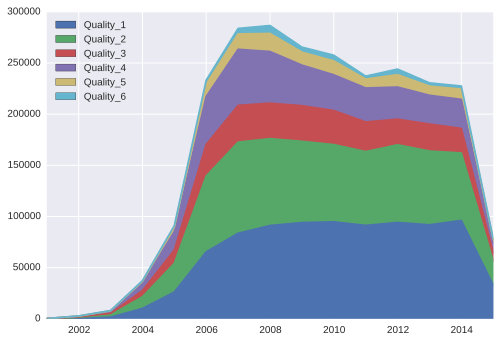

In [18]:
df_quality.plot(kind='area',sort_columns=True)

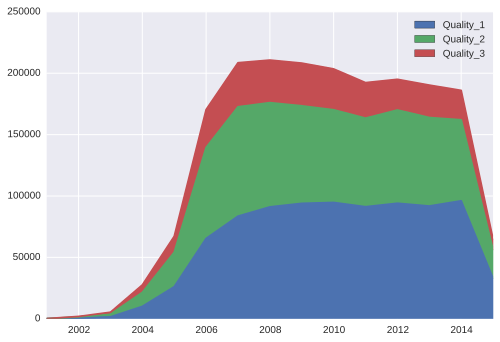

In [19]:
df_quality[['Quality_1','Quality_2','Quality_3']].plot(kind='area',sort_columns=True)